7. Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.

Demonstrating Linear Regression and Polynomial Regression



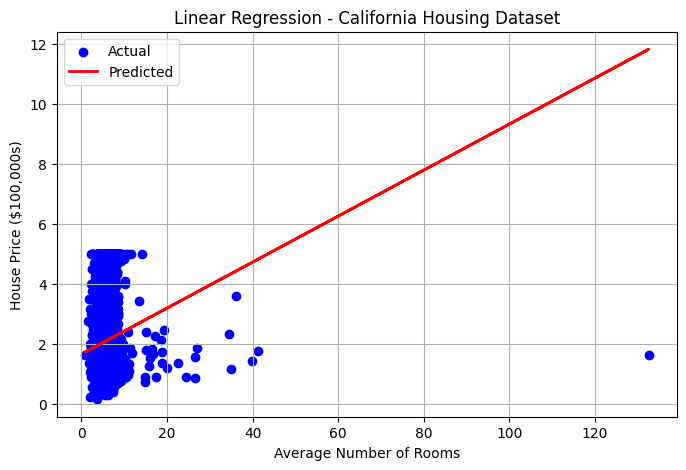

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901



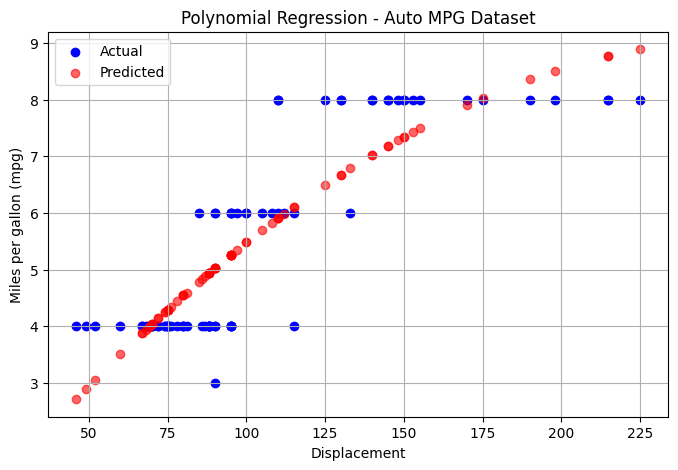

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205861
R^2 Score: 0.7505650609469626


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression on California Housing Dataset
def linear_regression_california():
    housing = fetch_california_housing()
    X = pd.DataFrame(housing.data, columns=housing.feature_names)[["AveRooms"]]  # Using average number of rooms
    y = housing.target  # Median house value (in $100,000s)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.plot(X_test, y_pred, color='red', label="Predicted", linewidth=2)
    plt.xlabel("Average Number of Rooms")
    plt.ylabel("House Price ($100,000s)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Metrics
    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print()


# Polynomial Regression on Auto MPG Dataset
def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    
    data = pd.read_csv(url, sep=r'\s+', names=column_names, na_values="?")
    data = data.dropna()

    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.6)
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Metrics
    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_california()
    polynomial_regression_auto_mpg()
